# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [46]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


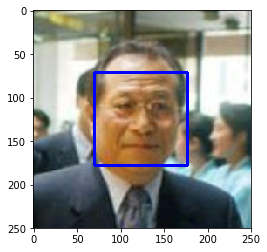

In [47]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[11])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [48]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

0.98 of the first 100 images in human_files have a detected human face.

0.17 of the first 100 images in dog_files have a detected human face.

In [52]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_dect=[]# human_dect refers to the output of function "face_detector" for "human_files_short"
dog_dect=[]# dog_dect refers to the output of function "face_detector" for "dog_files_short"
for human in human_files_short:
    output=int(face_detector(human))
    human_dect.append(output)
for dog in dog_files_short:
    output=int(face_detector(dog))
    dog_dect.append(output)

human_accuracy=sum(human_dect)/len(human_dect)
dog_accuracy=sum(dog_dect)/len(dog_dect)
print(human_accuracy,"of the first 100 images in human_files have a detected human face.")
print(dog_accuracy,"of the first 100 images in dog_files have a detected human face.",)
    


0.98 of the first 100 images in human_files have a detected human face.
0.17 of the first 100 images in dog_files have a detected human face.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [53]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [54]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 109901456.28it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [55]:
from PIL import Image
import torchvision.transforms as transforms

def load_image(img_path):
    image = Image.open(img_path).convert('RGB')
    # resize to 224*224 since we use vgg16 which require the input size be 224*224
    newsize = (224, 224) 
    image = image.resize(newsize) 
    in_transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    return image
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    img=load_image(img_path)
    ## Return the *index* of the predicted class for that image
    if use_cuda:
        img = img.cuda()
    VGG16.eval()
    index=VGG16(img)
    #print("index",index)
    return index # predicted class index


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [56]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index=VGG16_predict(img_path)
    _, pred = torch.max(index, 1) 
    if pred<=268 and pred>=151:
        return True
    else:
        dog=False
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

0.0 of the first 100 images in human_files have a detected dog.

1.0 of the first 100 images in dog_files have a detected dog.

In [57]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
from tqdm import tqdm

human_dect=[]# human_dect refers to the output of function "face_detector" for "human_files_short"
dog_dect=[]# dog_dect refers to the output of function "face_detector" for "dog_files_short"
for human in human_files_short:
    output=int(dog_detector(human))
    human_dect.append(output)
for dog in dog_files_short:
    output=int(dog_detector(dog))
    dog_dect.append(output)

human_accuracy=sum(human_dect)/len(human_dect)
dog_accuracy=sum(dog_dect)/len(dog_dect)
print(human_accuracy,"of the first 100 images in human_files have a detected dog.")
print(dog_accuracy,"of the first 100 images in dog_files have a detected dog.",)
    


0.0 of the first 100 images in human_files have a detected dog.
1.0 of the first 100 images in dog_files have a detected dog.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [24]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [7]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import os
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
num_workers = 2
# how many samples per batch to load
batch_size = 16
# percentage of training set to use as validation


# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
 )])
 
 
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.CenterCrop((224,224)),
    transforms.RandomHorizontalFlip(),#Horizontally flip the given image randomly with a given probability.
    transforms.RandomRotation(10),#Rotate the image by angle.
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
 )])

#Define TrainLoader
train_path = '/data/dog_images/train/'
train_dataset = datasets.ImageFolder(
    root=train_path,
    transform=transform_train
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    shuffle=True,drop_last=True
)

#Define TestLoader
test_path = '/data/dog_images/test/'
test_dataset = datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    shuffle=True,drop_last=True
)
#Define ValidLoader
valid_path = '/data/dog_images/valid/'
valid_dataset = datasets.ImageFolder(
    root=valid_path,
    transform=transform
)
valid_loader = torch.utils.data.DataLoader(
    valid_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    shuffle=True,drop_last=True
)

#Get the class label
classes={}
for i in os.listdir("/data/dog_images/train"):
    key=i.split(".")[0]
    value=i.split(".")[1]
    classes[key]=value

In [8]:
#get how many class labels we have=133
len(classes)

133

In [86]:
#get the size of the data. The result is 6680
print(len(train_loader.dataset))

6680


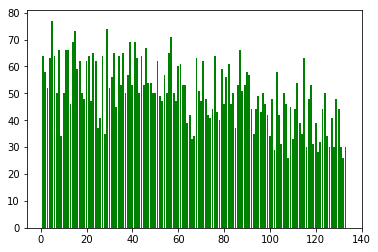

In [10]:
#check whether the training data are balanced
import collections
balanced_check={}
for i in os.listdir("/data/dog_images/train"):
    key=int(i.split(".")[0])
    number=len(os.listdir("/data/dog_images/train/"+i))
    balanced_check[key]=number
plt.bar(list(balanced_check.keys()), balanced_check.values(), color='g')
plt.show()

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

For **training data**, my code will firstly resize the image to 224✖️224. Then, a certer crop(224✖️224) is made on the image. The image is also horizontally flipped randomly with the default  probability (i.e.,0.5). I also randomly rotate the image with the angle of 10. After the input has been converted to tentor, the image has been normalized with mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225] For the **validation data and test data**, I don't apply the RandomHorizontalFlip()and RandomRotation(10).
The input size is 224✖️224✖️3. The reason why I choose size 224 is because 224✖️224 is a common choice. Many pretrained models (e.g., VGG16, ResNet50) use 224✖️224✖️3 as the input size.

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

I augment the dataset with "RandomHorizontalFlip" and "RandomRotation".

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [77]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        self.features=nn.Sequential(
            nn.Conv2d(3,16,3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout(0.25),
            nn.Conv2d(16,32,3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout(0.25),
            nn.Conv2d(32,64,3, stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout(0.25),
        )
        self.classifier=nn.Sequential(
            nn.Linear(28*28*64,512),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(256,133),
        )
        ## Define layers of a CNN
    
    def forward(self, x):
        ## Define forward behavior
        x=self.features(x)
        ##Flatten
        x = x.view(-1, 28*28*64)
        x=self.classifier(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [78]:
model_scratch

Net(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout(p=0.25)
  )
  (classifier): Sequential(
    (0): Linear(in_features=50176, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.25)
    (6): Linear(in_features=256, out_features=133, bias=True)
  )
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

For the feature layers, I searched the website to find the common architecture typically used in CNN. I have three convolutional layers with a kernel size of 3x3, stride=(1, 1) and padding=(1, 1). between the convolutional layers, I set a maxpool layer with a 2x2 kernel and a stride of 2. To avoid overfitting, I also add the dropout layers with p=0.25.

For the classifer layers, I have three fully connected layers with ReLu activation function. Since we have 133 categorizes, I set out_features=133 for the last layer. I also add the dropout layers to avoid overfitting. 

__Finally, the detailed architecture is as below:__
Net(<br>
(features): Sequential(<br>
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>
    (1): ReLU()<br>
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)<br>
    (3): Dropout(p=0.25)<br>
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>
    (5): ReLU()<br>
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)<br>
    (7): Dropout(p=0.25)<br>
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>
    (9): ReLU()<br>
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)<br>
    (11): Dropout(p=0.25)<br>
  )<br>
  (classifier): Sequential(<br>
    (0): Linear(in_features=50176, out_features=512, bias=True)<br>
    (1): ReLU()<br>
    (2): Dropout(p=0.25)<br>
    (3): Linear(in_features=512, out_features=256, bias=True)<br>
    (4): ReLU()<br>
    (5): Dropout(p=0.25)<br>
    (6): Linear(in_features=256, out_features=133, bias=True)<br>
  )<br>
)<br>


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [79]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [ ]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
def train(n_epochs, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for data, target in train_loader:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output=model(data)
            # calculate the batch loss
            #print("output:", output.shape, "target:",target.shape)
            #print(target)
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for data, target in valid_loader:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            out=model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        #save the weights every 20 epochs
        if epoch==20:
            print("Save the the 20th epoch----------------")
            torch.save(model.state_dict(), 'model_scratch20.pt')
        if epoch==40:
            print("Save the the 40th epoch----------------")
            torch.save(model.state_dict(), 'model_scratch40.pt')
        if epoch==60:
            print("Save the the 60th epoch----------------")
            torch.save(model.state_dict(), 'model_scratch60.pt')
        if epoch==80:
            print("Save the the 80th epoch----------------")
            torch.save(model.state_dict(), 'model_scratch80.pt')
        if epoch==100:
            print("Save the the 100th epoch----------------")
            torch.save(model.state_dict(), 'model_scratch100.pt')
        if epoch==120:
            print("Save the the 120th epoch----------------")
            torch.save(model.state_dict(), 'model_scratch120.pt')
        if epoch==140:
            print("Save the the 140th epoch----------------")
            torch.save(model.state_dict(), 'model_scratch140.pt')
        if epoch==160:
            print("Save the the 160th epoch----------------")
            torch.save(model.state_dict(), 'model_scratch160.pt')
        if epoch==180:
            print("Save the the 180th epoch----------------")
            torch.save(model.state_dict(), 'model_scratch180.pt')
        if epoch==200:
            print("Save the the 200th epoch----------------")
            torch.save(model.state_dict(), 'model_scratch200.pt')
    # return trained model
    return model


# train the model
model_scratch = train(200, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
# model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.882260 	Validation Loss: 4.860298
Validation loss decreased (inf --> 4.860298).  Saving model ...
Epoch: 2 	Training Loss: 4.868043 	Validation Loss: 4.857727
Validation loss decreased (4.860298 --> 4.857727).  Saving model ...
Epoch: 3 	Training Loss: 4.833084 	Validation Loss: 4.936254
Epoch: 4 	Training Loss: 4.783168 	Validation Loss: 4.913452
Epoch: 5 	Training Loss: 4.738482 	Validation Loss: 5.240855
Epoch: 6 	Training Loss: 4.676800 	Validation Loss: 4.997023
Epoch: 7 	Training Loss: 4.612467 	Validation Loss: 5.107756
Epoch: 8 	Training Loss: 4.580529 	Validation Loss: 5.161445
Epoch: 9 	Training Loss: 4.555581 	Validation Loss: 5.189588
Epoch: 10 	Training Loss: 4.548821 	Validation Loss: 5.237585
Epoch: 11 	Training Loss: 4.514542 	Validation Loss: 5.330670
Epoch: 12 	Training Loss: 4.501679 	Validation Loss: 5.241595
Epoch: 13 	Training Loss: 4.475226 	Validation Loss: 5.102551
Epoch: 14 	Training Loss: 4.450791 	Validation Loss: 5.752841
Epoch: 1

In [80]:
model_scratch.load_state_dict(torch.load('model_scratch60.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [81]:
def test(model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for data, target in test_loader:
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss += loss.item()*data.size(0)
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
    # average test loss
    test_loss = test_loss/len(test_loader.dataset)        
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.625248


Test Accuracy: 15% (130/832)


__To whom it may concern,__

I have a question for CNN model. You can see that I set the epoch=200 at the very beginning. When I start to train the model, the validation loss increase immediately. I thought maybe it is overfitting so I stop train and test with the trained model. It turns the result is very bad. Finally, I decidely to ignore the validation loss and train the model with a reason epoch. The validation loss is increasing generally. However, the test result (15%) is pretty good. I was stuck here for about one week. Could you please tell me some possible reasons why the validation loss is increasing whereas the test accuracy is good? Thank you very much.

Best,

Tongyao


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [82]:
#I use the same data loader as above
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import os
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
num_workers = 2
# how many samples per batch to load
batch_size = 16
# percentage of training set to use as validation


# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
 )])
 
 
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.CenterCrop((224,224)),
    transforms.RandomHorizontalFlip(),#Horizontally flip the given image randomly with a given probability.
    transforms.RandomRotation(10),#Rotate the image by angle.
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
 )])

#Define TrainLoader
train_path = '/data/dog_images/train/'
train_dataset = datasets.ImageFolder(
    root=train_path,
    transform=transform_train
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    shuffle=True,drop_last=True
)

#Define TestLoader
test_path = '/data/dog_images/test/'
test_dataset = datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    shuffle=True,drop_last=True
)
#Define ValidLoader
valid_path = '/data/dog_images/valid/'
valid_dataset = datasets.ImageFolder(
    root=valid_path,
    transform=transform
)
valid_loader = torch.utils.data.DataLoader(
    valid_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    shuffle=True,drop_last=True
)

#Get the class label
classes={}
for i in os.listdir("/data/dog_images/train"):
    key=i.split(".")[0]
    value=i.split(".")[1]
    classes[key]=value

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [59]:
import torchvision.models as models
import torch.nn as nn
import torch
# check if CUDA is available
use_cuda = torch.cuda.is_available()

## TODO: Specify model architecture 
model_transfer=models.resnet50(pretrained=True)
for parameter in model_transfer.parameters():
    parameter.requires_grad=False
model_transfer.fc=nn.Sequential(
            nn.Linear(2048,1024),
            nn.ReLU(),
            nn.Linear(1024,256),
            nn.ReLU(),
            nn.Linear(256,133),
)

if use_cuda:
    model_transfer = model_transfer.cuda()


In [60]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

The pretained model I use is resnet50 because based on my previous experience, resnet50 has better performance than VGG16.
I change the (fc) layer to make the output_features=133. I keep the weights of other layers. 

I change the (fc) layer as below:
(fc): Sequential(<br>
    (0): Linear(in_features=2048, out_features=1024, bias=True)<br>
    (1): ReLU()<br>
    (2): Linear(in_features=1024, out_features=256, bias=True)<br>
    (3): ReLU()<br>
    (4): Linear(in_features=256, out_features=133, bias=True)<br>
  )
)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [61]:
# Select Loss function and optimizer 
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.01)


In [7]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
def train(n_epochs, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for data, target in train_loader:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output=model(data)
            # calculate the batch loss
            #print("output:", output.shape, "target:",target.shape)
            #print(target)
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for data, target in valid_loader:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            out=model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        #save the weights every 20 epochs
        if epoch==20:
            print("Save the the 20th epoch----------------")
            torch.save(model.state_dict(), 'model_transfer20.pt')
        if epoch==40:
            print("Save the the 40th epoch----------------")
            torch.save(model.state_dict(), 'model_transfer40.pt')
        if epoch==60:
            print("Save the the 60th epoch----------------")
            torch.save(model.state_dict(), 'model_transfer60.pt')
        if epoch==80:
            print("Save the the 80th epoch----------------")
            torch.save(model.state_dict(), 'model_transfer80.pt')
        if epoch==100:
            print("Save the the 100th epoch----------------")
            torch.save(model.state_dict(), 'model_transfer100.pt')
        if epoch==120:
            print("Save the the 120th epoch----------------")
            torch.save(model.state_dict(), 'model_transfer120.pt')
        if epoch==140:
            print("Save the the 140th epoch----------------")
            torch.save(model.state_dict(), 'model_transfer140.pt')
        if epoch==160:
            print("Save the the 160th epoch----------------")
            torch.save(model.state_dict(), 'model_transfer160.pt')
        if epoch==180:
            print("Save the the 180th epoch----------------")
            torch.save(model.state_dict(), 'model_transfer180.pt')
        if epoch==200:
            print("Save the the 200th epoch----------------")
            torch.save(model.state_dict(), 'model_transfer200.pt')
    # return trained model
    return model



### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [14]:
#import workspace_utils failed, so I copy the functions in workspace_utils here
import signal

from contextlib import contextmanager

import requests


DELAY = INTERVAL = 4 * 60  # interval time in seconds
MIN_DELAY = MIN_INTERVAL = 2 * 60
KEEPALIVE_URL = "https://nebula.udacity.com/api/v1/remote/keep-alive"
TOKEN_URL = "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token"
TOKEN_HEADERS = {"Metadata-Flavor":"Google"}


def _request_handler(headers):
    def _handler(signum, frame):
        requests.request("POST", KEEPALIVE_URL, headers=headers)
    return _handler


@contextmanager
def active_session(delay=DELAY, interval=INTERVAL):
    """
    Example:

    from workspace_utils import active session

    with active_session():
        # do long-running work here
    """
    token = requests.request("GET", TOKEN_URL, headers=TOKEN_HEADERS).text
    headers = {'Authorization': "STAR " + token}
    delay = max(delay, MIN_DELAY)
    interval = max(interval, MIN_INTERVAL)
    original_handler = signal.getsignal(signal.SIGALRM)
    try:
        signal.signal(signal.SIGALRM, _request_handler(headers))
        signal.setitimer(signal.ITIMER_REAL, delay, interval)
        yield
    finally:
        signal.signal(signal.SIGALRM, original_handler)
        signal.setitimer(signal.ITIMER_REAL, 0)


def keep_awake(iterable, delay=DELAY, interval=INTERVAL):
    """
    Example:

    from workspace_utils import keep_awake

    for i in keep_awake(range(5)):
        # do iteration with lots of work here
    """
    with active_session(delay, interval): yield from iterable

In [15]:
# train the model

with active_session():
    model_transfer =  train(200, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch: 1 	Training Loss: 4.831843 	Validation Loss: 4.863299
Validation loss decreased (inf --> 4.863299).  Saving model ...
Epoch: 2 	Training Loss: 4.603571 	Validation Loss: 4.895850
Epoch: 3 	Training Loss: 3.928447 	Validation Loss: 5.423188
Epoch: 4 	Training Loss: 2.858340 	Validation Loss: 6.988823
Epoch: 5 	Training Loss: 2.183170 	Validation Loss: 8.068776
Epoch: 6 	Training Loss: 1.834878 	Validation Loss: 10.089427
Epoch: 7 	Training Loss: 1.682865 	Validation Loss: 9.839106
Epoch: 8 	Training Loss: 1.544585 	Validation Loss: 10.307363
Epoch: 9 	Training Loss: 1.467314 	Validation Loss: 10.561123
Epoch: 10 	Training Loss: 1.362859 	Validation Loss: 10.822703
Epoch: 11 	Training Loss: 1.331120 	Validation Loss: 11.593353
Epoch: 12 	Training Loss: 1.332612 	Validation Loss: 10.787456
Epoch: 13 	Training Loss: 1.293180 	Validation Loss: 11.462998
Epoch: 14 	Training Loss: 1.254616 	Validation Loss: 12.173769
Epoch: 15 	Training Loss: 1.210609 	Validation Loss: 11.673405
Epoch:

Process Process-733:
Process Process-734:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
 

KeyboardInterrupt: 

  File "/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/transforms.py", line 546, in __call__
    return F.resized_crop(img, i, j, h, w, self.size, self.interpolation)
  File "/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/datasets/folder.py", line 130, in pil_loader
    return img.convert('RGB')
  File "/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/functional.py", line 331, in resized_crop
    img = resize(img, size, interpolation)
  File "/opt/conda/lib/python3.6/site-packages/PIL/Image.py", line 892, in convert
    self.load()
  File "/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/functional.py", line 206, in resize
    return img.resize(size[::-1], interpolation)
  File "/opt/conda/lib/python3.6/site-packages/PIL/ImageFile.py", line 235, in load
    n, err_code = decoder.decode(b)
KeyboardInterrupt
  File "/opt/conda/lib/py

In [89]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer40.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [90]:
def test(model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for data, target in test_loader:
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss += loss.item()*data.size(0)
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
    # average test loss
    test_loss = test_loss/len(test_loader.dataset)        
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [35]:
test(model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.397951


Test Accuracy: 87% (730/832)


I test the model with the weights when epoch=40, the test accuracy is pretty good (87%).

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [88]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]
model_transfer.load_state_dict(torch.load('model_transfer40.pt'))
def load_image(img_path):
    image = Image.open(img_path).convert('RGB')
    # resize to 224*224 since we use vgg16 which require the input size be 224*224
    newsize = (224, 224) 
    image = image.resize(newsize) 
    in_transform = transform = transforms.Compose([transforms.Resize(224),
                                                   transforms.CenterCrop((224,224)),
                                                   transforms.ToTensor(),
                                                   transforms.Normalize(
                                                       mean=[0.485, 0.456, 0.406],
                                                       std=[0.229, 0.224, 0.225]
                                                   )])
    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    return image
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img=load_image(img_path)
    ## Return the *index* of the predicted class for that image
    if use_cuda:
        img = img.cuda()
    model_transfer.eval()
    output=model_transfer(img)
    _, pred = torch.max(output, 1)
    breed = class_names[pred]
    return breed

In [66]:
class_names

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog',
 'Australian cattle dog',
 'Australian shepherd',
 'Australian terrier',
 'Basenji',
 'Basset hound',
 'Beagle',
 'Bearded collie',
 'Beauceron',
 'Bedlington terrier',
 'Belgian malinois',
 'Belgian sheepdog',
 'Belgian tervuren',
 'Bernese mountain dog',
 'Bichon frise',
 'Black and tan coonhound',
 'Black russian terrier',
 'Bloodhound',
 'Bluetick coonhound',
 'Border collie',
 'Border terrier',
 'Borzoi',
 'Boston terrier',
 'Bouvier des flandres',
 'Boxer',
 'Boykin spaniel',
 'Briard',
 'Brittany',
 'Brussels griffon',
 'Bull terrier',
 'Bulldog',
 'Bullmastiff',
 'Cairn terrier',
 'Canaan dog',
 'Cane corso',
 'Cardigan welsh corgi',
 'Cavalier king charles spaniel',
 'Chesapeake bay retriever',
 'Chihuahua',
 'Chinese crested',
 'Chinese shar-pei',
 'Chow cho

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [87]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path):
        print("hello, human!")
        print(f'You look like a ... {predict_breed_transfer(img_path)}')
        plt.imshow(Image.open(img_path))
        plt.show()
    elif dog_detector(img_path):
        print("hello, dog!")
        print(f'Your predicted breed is  ... {predict_breed_transfer(img_path)}')
        plt.imshow(Image.open(img_path))
        plt.show()    
    else:
        print("Sorry! I can't detect any human or dog here.")
        plt.imshow(Image.open(img_path))
        plt.show()
        

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I think the output is much better than I expected. I think I can make three improvements as below:

- I should try different parameters to see whether I can get a higher accuracy score. For example, change the learning rate to 0.001 or 0.003. Also, I can try different batch size.
- I can change the architecture of the (fc) layer in the pretained model. For example, I can add more layers. Or I can even try more advanced pretrained model, such as WideResNet or MNASNet.
- Right now, I use RandomHorizontalFlip and RandomRotation to augment the data. I can try different ways to augment the training data. I can also resize the data to different sizes rather than 224✖️224✖️3.

hello, human!
You look like a ... Pembroke welsh corgi


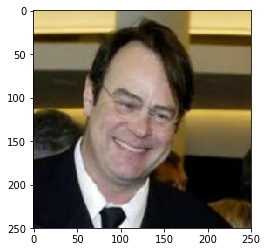

hello, human!
You look like a ... American foxhound


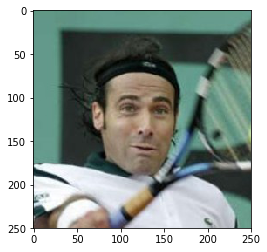

hello, human!
You look like a ... Chesapeake bay retriever


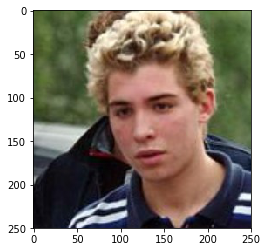

hello, dog!
Your predicted breed is  ... Bullmastiff


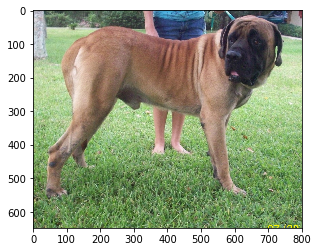

hello, dog!
Your predicted breed is  ... Mastiff


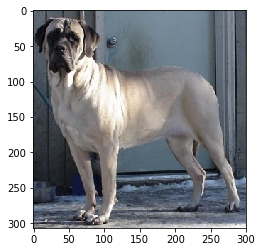

hello, dog!
Your predicted breed is  ... Bullmastiff


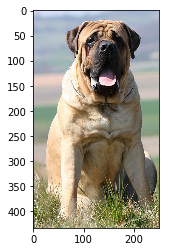

In [71]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

hello, dog!
Your predicted breed is  ... Chesapeake bay retriever


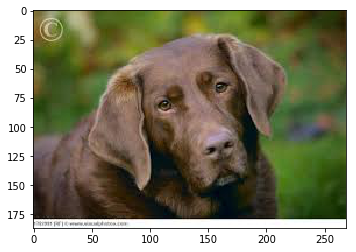

Sorry! I can't detect any human or dog here.


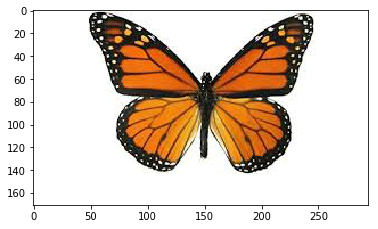

hello, dog!
Your predicted breed is  ... Irish setter


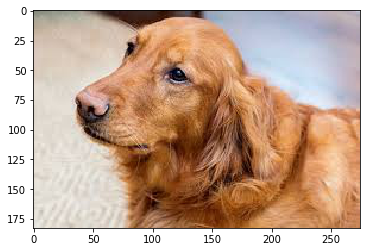

hello, human!
You look like a ... American staffordshire terrier


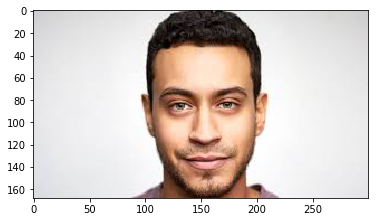

hello, dog!
Your predicted breed is  ... Maltese


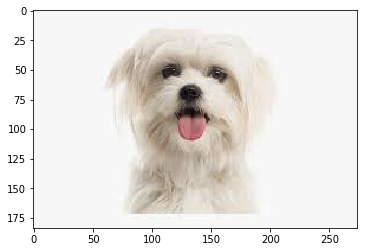

hello, human!
You look like a ... American staffordshire terrier


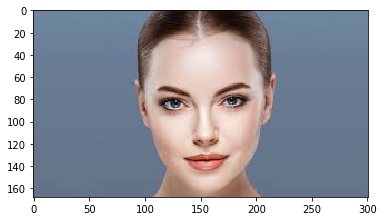

hello, dog!
Your predicted breed is  ... Dalmatian


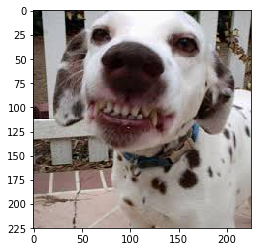

In [91]:
#test the model with my own photos in Dog_Human_images 
import os
for file in os.listdir("./Dog_Human_images"):
    run_app("./Dog_Human_images/"+file)